## Loading the appropriate packages

The first thing we have to do is to load up some packages, including NumPy which is used for matrix and vector manipulation when you are doing scientific computing with Python and also several functions from scikit-learn!
We will also load the pandas package, a data analysis library for Python as well as plotly, which is a cool visualization library for Python. We will also some other packages to show visualizations of decision trees.

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
import pandas as pd
import plotly.express as px
from pydotplus import graph_from_dot_data
from IPython.display import Image

NumPy will show floating point (real) numbers in the scientific notation. Let's turn that off.

In [22]:
np.set_printoptions(suppress=True)

## Loading and examining the data

Let's load our data into a pandas data frame (`DataFrame`), which are good tools for manipulating, an in our case for now, displaying the data. We will load our data from a CSV (Comma-Separated Values) file.

In [23]:
df = pd.read_csv('Datasets\Employee_Churn_Dataset.csv')

let's take a peek at our data (as a table) to see if everything is alright. We will ask the Jupyter notebook to show the data frame object `df` that we loaded with the data from the CSV file. Calling an object will let us inspect that object and in the case of pandas data frames, this shows us the data frame as a table:

In [24]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  Departments   salary  
0                          0             0       0  
1                          0             0       1  
2                          0             0       1  
3                          0             0       0  
4                          0             0       0  
...                      ...           ...     ...  
14994                      0             6       0  
14995                      0             6       0  
14996                      0             6       0  
14997                      0             6       0  
14998                      0             6       0  

[14999 rows x 10 columns]

Cool. Everything seems fine. One of the other tools for checking our data is visualizing the data. However, our data has more than 3 features, so we cannot directly visualize it (We can directly see only up to 3D). One good way to check for statistical shape of the data is to use a matrix of scatter plots. We can get a feel for the distribution of our data using that.

We are using data visualization tools from the plotly package. We are going to ask plotly to show us a scatter matrix. However, we care only to see the dimensions of the data that are features and the label part should be used to show different classes in different colours. Also, the plotly will try to fit the entire scatter matrix to the width of our screen and with data with high number features, we don't want that because it may give small pairwise scatter plots, so let's specify a size of 256 pixels for the size of each scatter plot. We ask plotly to create a figure for us and show it:

In [25]:
data_dimensions = df.columns[:-1].to_list()
figure_size = df.shape[1] * 128

fig = px.scatter_matrix(df, dimensions=data_dimensions, color='left', width=figure_size, height=figure_size)
fig.show()

In [26]:
fig.write_html("viz-CD.html")

Now that everything seems good, let's get our data as NumPy arrays that will be used by scikit-learn algorithms. Our data `X` will be a matrix which has different datapoints in different rows and different features in different columns and since the `'Label'` column of the datafram `df` is not a feature of the data (but rather the label), let's exclude that. Then, our labels (or _targets_) `y` will be a vector consisting of simply that `'Label'` column of data frame `df`.

In [27]:
X = df.drop('left', axis=1).to_numpy()
y = df['left'].to_numpy()

Let's see if everything is fine. Let's see our data `X`:

In [28]:
X

array([[0.38, 0.53, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 6.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 6.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 6.  , 0.  ]])

Now let's check the shape of `X`.

In [29]:
X.shape

(14999, 9)

Let's do the same check with the targets vector `y`:

In [30]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

...and the shape of `y` should be the same number of rows and singular in column (so there is only a row dimension and no column dimension):

In [31]:
y.shape

(14999,)

Perfect! Everything looks fine.

## Splitting the data

In [32]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.4, random_state=0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

## Building and fitting a decision tree

In [33]:
dtree=DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualizing the decision tree

Now, let's visualize our decision tree. Let's export our model as a special kind of data, create a visual representation form that, generate a graph from that representation and show that graph as an image (it may be a big image, so you may have to scroll to see the whole thing):

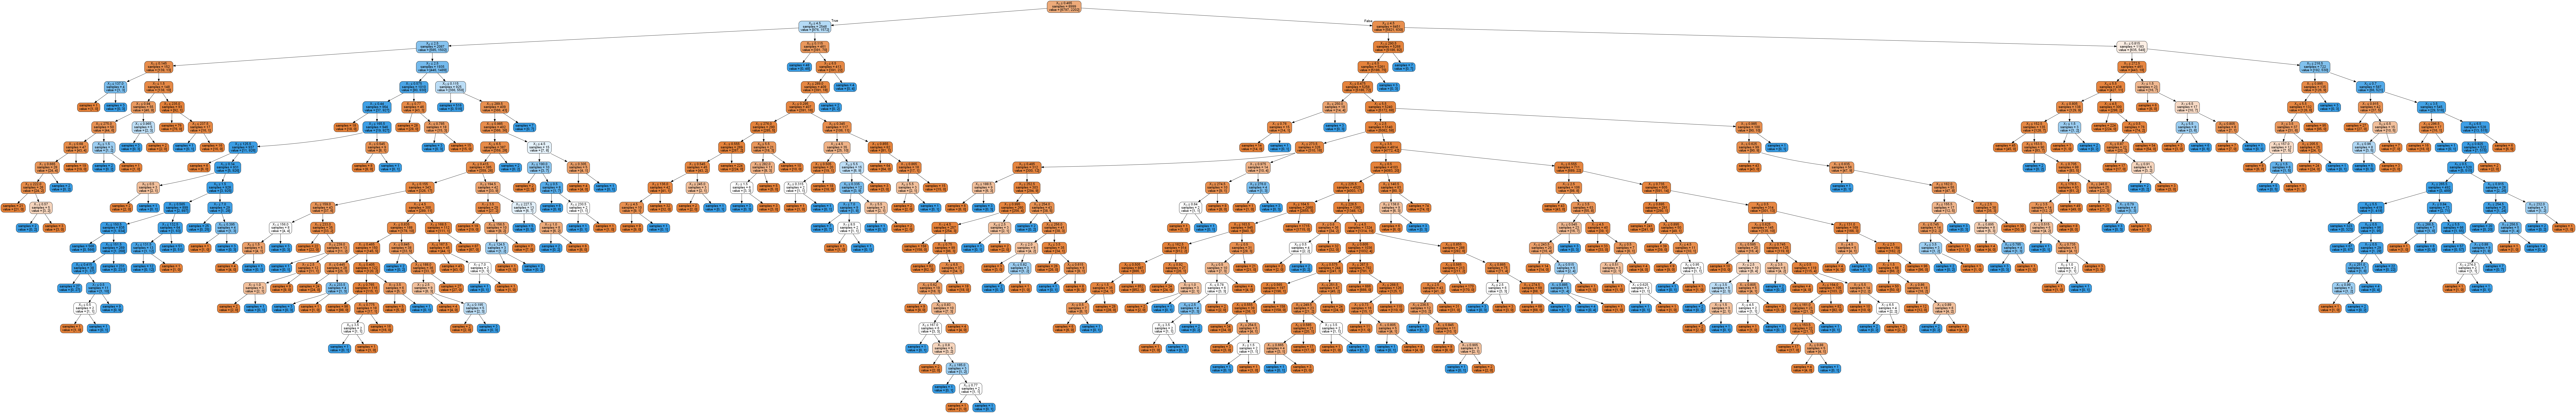

In [35]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, impurity=False, special_characters=True)
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), unconfined=True)

## Model assessment and selection

You are going to put in the code that asks our decision tree dtree to predict the label for training data X_train and assign it to a vector variable yhat_train. Remember that the predict is the name of the method that asks a model object to predict labels. 

In [36]:
yhat_train = dtree.predict(X_train)

In [37]:
accuracy_score(yhat_train, y_train)

1.0

A perfect 1.0 or 100%! However, that was what was expected given the minimum leaf size was 1, we let the decision tree split leafs with even 2 points in them and we had no tree depth limittation among other things.

Let's use our validation data then. Calculate yhat_validation by asking dtree to predict labels for X_validation. Then, we can calculate the score for validation data.

In [38]:
### begin your code here (1 line).
yhat_validation = dtree.predict(X_validation)
### end your code here.
accuracy_score(yhat_validation, y_validation)

0.977

Let's create a new decision tree object dtree2, but this time let's set a minimum number of samples per leaf. Let's do 15. Go ahead and create dtree2, however, this time specify that you want the min_samples_leaf to be set to 15. Then, just fit your model to the training data and targets, X_train and y_train:

In [39]:
dtree2=DecisionTreeClassifier(min_samples_leaf=15)
dtree2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now, predict yhat_train2, so we can the accuracy on training data:

In [40]:
### begin your code here (1 line).
yhat_train2=dtree2.predict(X_train)
### end your code here.
accuracy_score(yhat_train2, y_train)

0.974997221913546

Training accuracy is predictably lower as we restrcited our decision tree, so it does not fit perfectly to training data because of its constraints.

Let's predict yhat_validation2 and we can the accuracy on validation data:

In [41]:
### begin your code here (1 line).
yhat_validation2=dtree2.predict(X_validation)
### end your code here.
accuracy_score(yhat_validation2, y_validation)

0.9693333333333334

## Evaluating the decision tree


Finally, let's use the test data to get a final accuracy performance number for our model. Predict yhat_test2 using dtree2. We can then calculate the accuracy on test data:

In [42]:
### begin your code here (1 line).
yhat_test2=dtree2.predict(X_test)
### end your code here.
accuracy_score(yhat_test2, y_test)

0.9723333333333334

Voila! The accuracy on test data, on validation data and on training data are close to each other, which is a good sign.

Well done!